<a href="https://colab.research.google.com/github/suebatista/random_exercises/blob/main/semi_supervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Semi supervised models

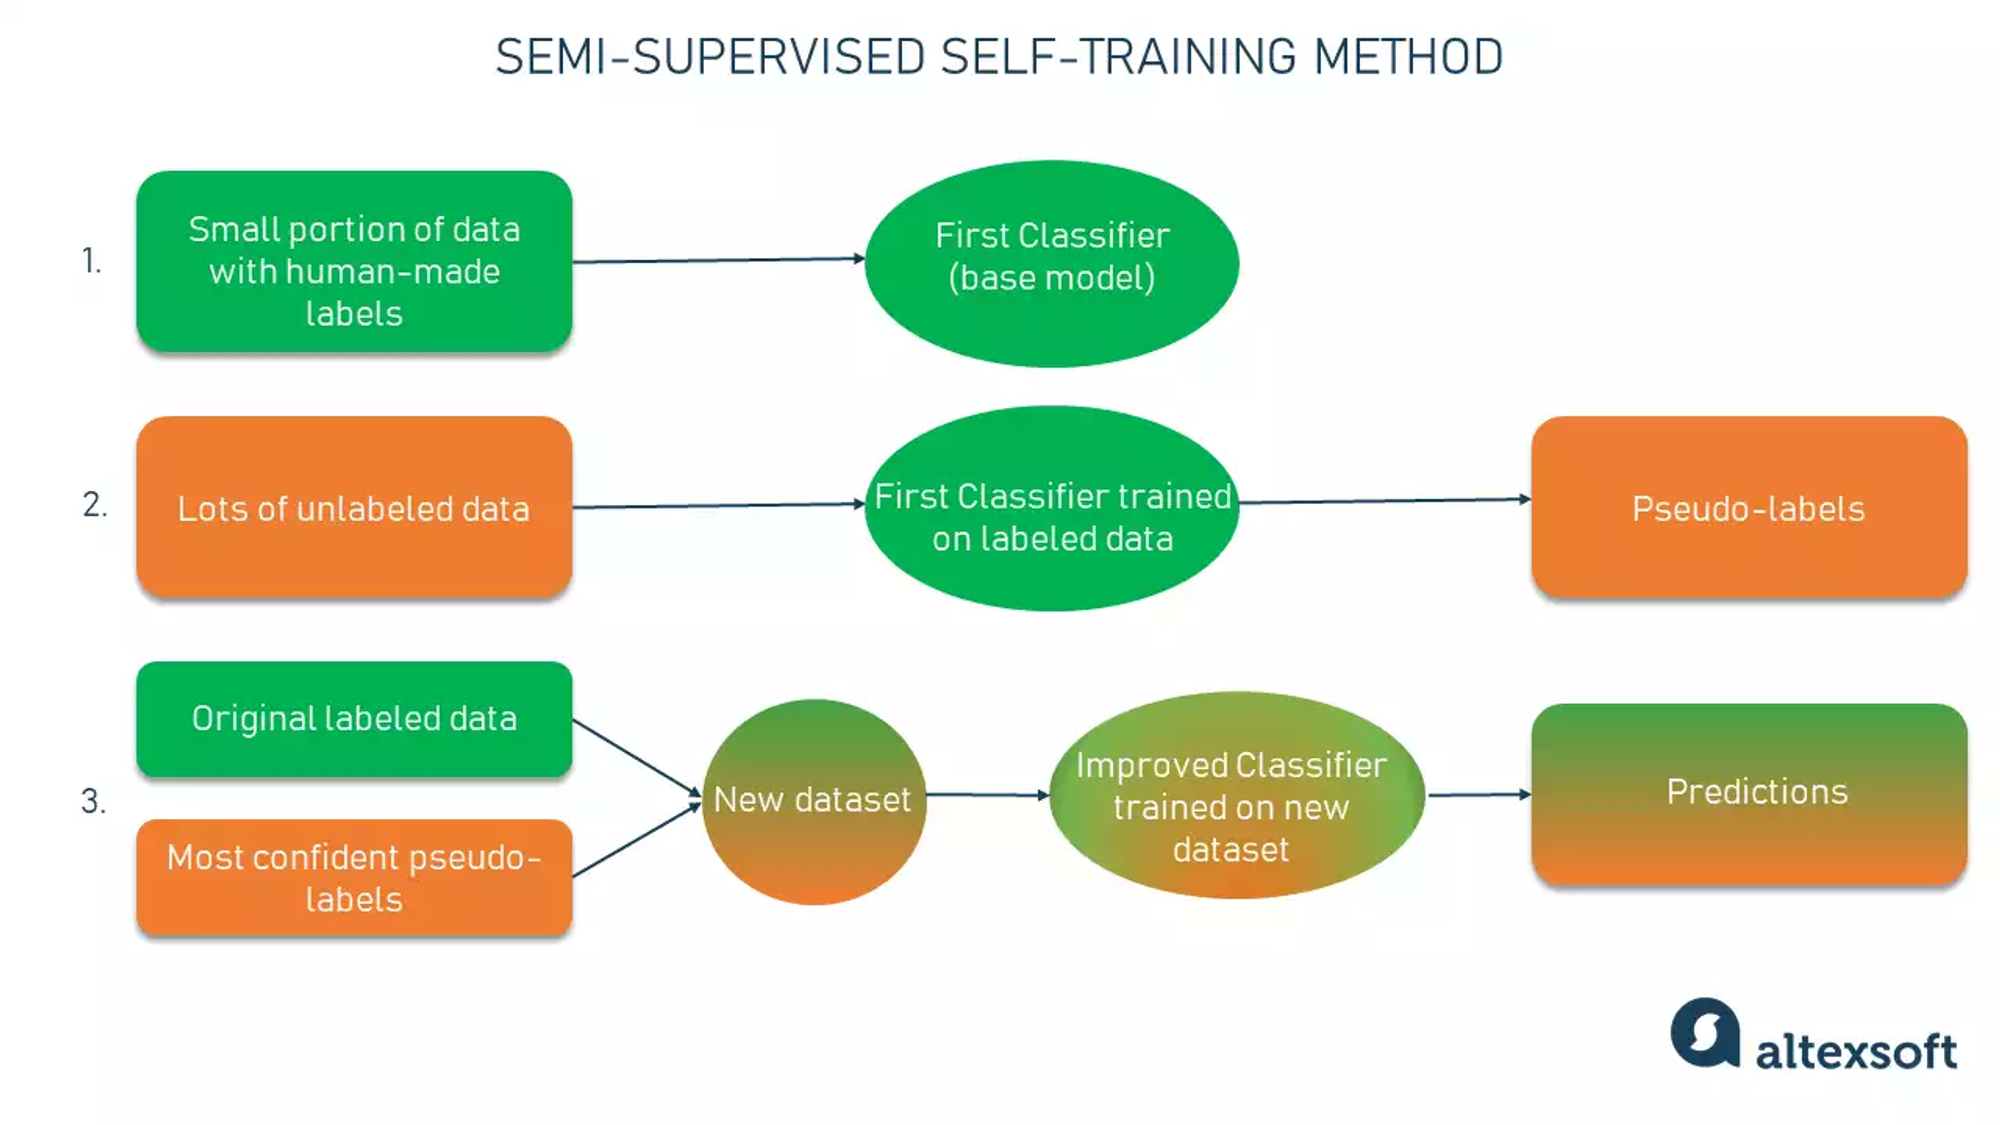

 # Explain semi supervised learning like I'm five

 imagine you're learning about different types of animals. Some animals have labels like "cat" or "dog" that tell you what they are. But there are some animals that you haven't seen before, and you don't know their names. Semi-supervised learning is like having a helpful friend who knows a lot about animals. They look at those new animals and tell you what they think they might be based on what they know.

You use both the animals with labels and the ones your friend helped with to learn more about animals in general. Your friend's guesses help you figure out the names of the unknown animals, and you become better at recognizing animals even without labels. So, semi-supervised learning is about learning from both things you know for sure and educated guesses to get better at understanding things you haven't seen much before.

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the dataset into labeled and unlabeled data
X_labeled, X_unlabeled, y_labeled, _ = train_test_split(X, y, test_size=0.8, stratify=y, random_state=42)

# Create a classifier for self-training
classifier = KNeighborsClassifier(n_neighbors=3)

# Train the classifier on the labeled data
classifier.fit(X_labeled, y_labeled)

# Use the classifier to predict labels for unlabeled data
pseudo_labels = classifier.predict(X_unlabeled)

# Combine labeled and pseudo-labeled data
X_combined = np.vstack((X_labeled, X_unlabeled))
y_combined = np.concatenate((y_labeled, pseudo_labels))

# Train a final classifier on the combined dataset
final_classifier = KNeighborsClassifier(n_neighbors=3)
final_classifier.fit(X_combined, y_combined)

# Evaluate the final classifier
accuracy = final_classifier.score(X, y)
print("Final classifier accuracy:", accuracy)


Final classifier accuracy: 0.9733333333333334


# Code

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the dataset into labeled and unlabeled data
X_labeled, X_unlabeled, y_labeled, _ = train_test_split(X, y, test_size=0.8, stratify=y, random_state=42)

# Create a classifier for self-training
classifier = KNeighborsClassifier(n_neighbors=3)

# Train the classifier on the labeled data
classifier.fit(X_labeled, y_labeled)

# Use the classifier to predict labels for unlabeled data
pseudo_labels = classifier.predict(X_unlabeled)

# Combine labeled and pseudo-labeled data
X_combined = np.vstack((X_labeled, X_unlabeled))
y_combined = np.concatenate((y_labeled, pseudo_labels))

# Train a final classifier on the combined dataset
final_classifier = KNeighborsClassifier(n_neighbors=3)
final_classifier.fit(X_combined, y_combined)

# Evaluate the final classifier
accuracy = final_classifier.score(X, y)
print("Final classifier accuracy:", accuracy)


Final classifier accuracy: 0.9733333333333334


# Example

Let's consider a practical example of semi-supervised learning using a text classification task, where you're trying to classify movie reviews as positive or negative.

**Step 1: Labeled Data**
You have a small set of labeled movie reviews where each review is labeled as positive or negative.

Labeled Data:

- Positive: "This movie was fantastic! I loved every moment."
- Negative: "The acting was terrible, and the plot made no sense."

**Step 2: Unlabeled Data**
You have a much larger set of unlabeled movie reviews that you don't have labeled sentiments for.

Unlabeled Data:

- "The cinematography was stunning."
- "I didn't enjoy the characters' development."
- "The dialogue felt authentic."
- "The movie lacked excitement."

**Step 3: Semi-Supervised Approach**
You decide to use a semi-supervised learning approach to improve your sentiment classification model. Here's how you might proceed:

1. **Train on Labeled Data:** You start by training a baseline sentiment classification model using the small labeled dataset.
2. **Predict Unlabeled Data:** Using the trained model, you predict the sentiments of the unlabeled movie reviews, effectively assigning them predicted labels (positive or negative).
3. **Combine Labeled and Predicted Data:** You now have a larger dataset that includes both the original labeled data and the newly labeled data from the predictions. This combined dataset has more information than just the initial labeled dataset.
4. **Retrain Model:** You retrain the sentiment classification model using the combined dataset of labeled and predicted data. This time, the model benefits from a larger dataset, including the unlabeled data.
5. **Evaluate and Iterate:** After retraining, you evaluate the model's performance on a separate validation or test set. If the performance improves, you might consider repeating the process iteratively with additional unlabeled data.

By incorporating the predictions from the unlabeled data, the semi-supervised approach can potentially enhance the model's accuracy and generalization compared to training on the labeled data alone. This is particularly useful in scenarios where obtaining a large amount of labeled data is challenging.